In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

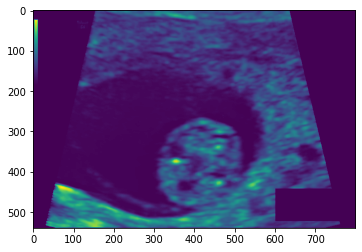

In [3]:
img_path = "./training_set/000_HC.png"
img = Image.open(img_path)
plt.imshow(img)
plt.show()

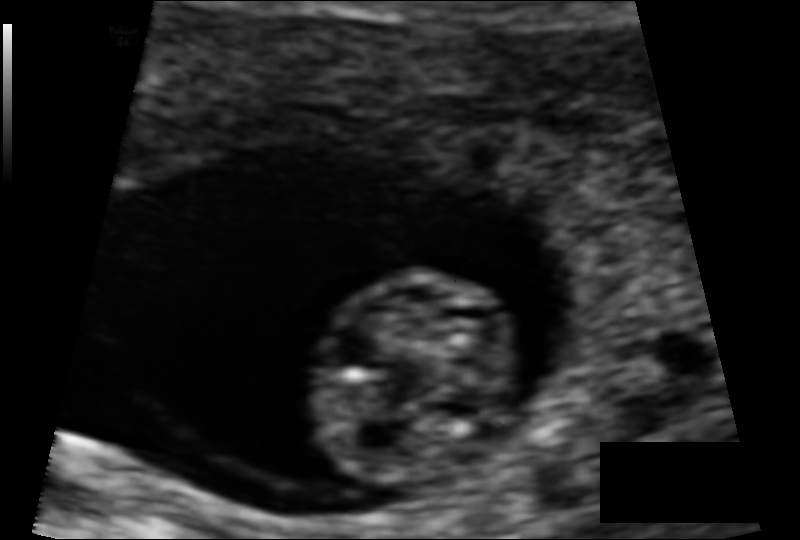

In [4]:
img